# Problem Statement:
    
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives us information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, we have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [1]:
#Importing the necessary Libraries

# linear algebra
import numpy as np 

import warnings
warnings.simplefilter("ignore")

# data processing
import pandas as pd
from pandas_profiling import ProfileReport

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import StratifiedKFold
import scikitplot as skplt
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import metrics

import pickle
import joblib


# Loading the Dataset - "titanic_train.csv"

In [2]:
df= pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Exploration/Analysis

In [3]:
#Printing first 5 rows of dataset

df.head().style.background_gradient(cmap='plasma')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S


In [4]:
#Printing last 5 rows of dataset

df.tail().style.background_gradient(cmap='plasma')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.000000,nan,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.000000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.450000,nan,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.000000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.750000,nan,Q


From the tables above, we can note a few things.
1. We need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them.
2. We can see that the features have widely different ranges, that we will need to convert into roughly the same scale. 
3. We can also spot some more features, that contain missing values (NaN = not a number), that we have to deal with.

In [5]:
#checking the dataset dimension
df.shape

(891, 12)

In [6]:
# checking the column names

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
#Checking datatype information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Remarks: The training-set has 891 Columns and 11 features + the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects. Below We have listed the features with a short description:


PassengerId: Unique Id of a passenger.

Survived   : Survival of a passenger 

Pclass     : Ticket class 

Name       : Passenger's name

Sex        : Sex of a passenger   

Age        : Age in years     

sibsp      : Number of siblings / spouses aboard the Titanic     

Parch      : Number of parents / children aboard the Titanic     

Ticket     : Ticket number     

Fare       : Passenger fare     

Cabin      : Cabin number     

Embarked   : Port of Embarkation

In [8]:
#checking for null values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Remarks: We cannot leave the cells empty, thus have to fill the tables with the most suitable values.

# Numerical Feature Analysis

In [9]:
# create a list of all numerical features

numeric_features = df.select_dtypes(exclude=['object']).columns
numeric_features

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [10]:
# create the dataframe of all numerical features

numeric_df = df[numeric_features]
numeric_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [11]:
#Checking for unique values in Name, Sex, Ticket, Cabin and Embarked before encoding

feature = ['Name','Sex','Ticket','Cabin','Embarked']
for x in feature:
    print(f'{x}\t\t: {len(df[x].unique())}')

Name		: 891
Sex		: 2
Ticket		: 681
Cabin		: 148
Embarked		: 4


Remarks:
Column Sex and Embarked has 2 and 4 unique values. So, it can be encoded for further processing.

Column Name and Ticket has 891 and 681 unique values which is almost the same as the total number of records. So, encoding is not required. Further it can be dropped as well.

Column Cabin has 148 unique values and since it also has 687 null values therefore this column can also be dropped, hence encoding is not required.

# Encoding

In [12]:
#Encoding Column Sex and Embarked with the help of LabelEncoder from preprocessing.
from sklearn.preprocessing import LabelEncoder

df_new = df.copy()
df_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
#Encoding Sex Column
le_sex = LabelEncoder()
df_new['Sex'] = le_sex.fit_transform(df_new['Sex'])
le_sex.classes_

array(['female', 'male'], dtype=object)

In [14]:
#Handling null value and encoding column Embarked

df_new['Embarked'] = df_new['Embarked'].replace(np.nan,df_new['Embarked'].mode()[0]) #replacing null value with mode value

le_embarked = LabelEncoder()
df_new['Embarked'] = le_embarked.fit_transform(df_new['Embarked'])
le_embarked.classes_

array(['C', 'Q', 'S'], dtype=object)

In [15]:
#Print 10 rows of new dataset after encoding
df_new.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,0


In [16]:
#Checking and handling NaN values of column Age

df_new['Age'] = df_new['Age'].replace(np.nan,df_new['Age'].median()) #replacing NaN value with median value
df_new['Age'].isnull().sum()

0

In [17]:
#Dropping column Name, Ticket, & Cabin from dataset

df_new.drop(columns=['Name','Ticket','Cabin'],inplace=True)
df_new.head() #Printing new dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


# Statistical Analysis

In [18]:
df_new.describe().T.style.background_gradient(cmap='flag')

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000000,446.000000,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,891.000000,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.000000,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Sex,891.000000,0.647587,0.477990,0.000000,0.000000,1.000000,1.000000,1.000000
Age,891.000000,29.361582,13.019697,0.420000,22.000000,28.000000,35.000000,80.000000
SibSp,891.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200
Embarked,891.000000,1.536476,0.791503,0.000000,1.000000,2.000000,2.000000,2.000000


Remarks:

count for all the columns are same, so, no data is missing.

mean is greater than median in Fare, so, data might be right skewed.

std is higher in PassengerId and Fare, so, data might be spreaded. 

Large difference between 75th percentile and max is present in Fare. There might be some outliers.

# Exploratory Data Analysis (EDA)

# Univariate Analysis for Numerical Features:

Survived(Target Attribute):
    
Survived Column represents the Survival status of the Passenger in Titanic'

0 = Died , 1 = Survived

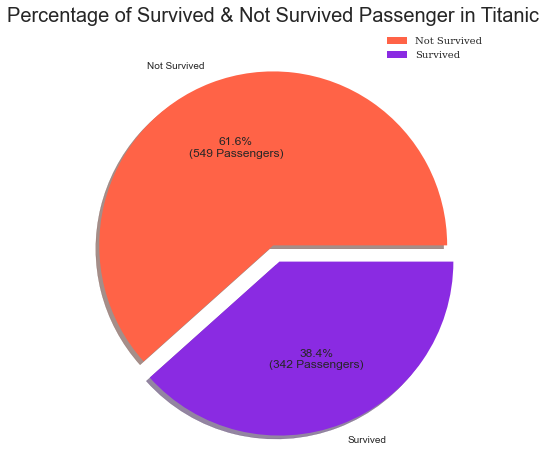

In [19]:
#Checking Survived(Target Attribute)

size = list(numeric_df['Survived'].value_counts())
labels = ['Not Survived', 'Survived']
colors = ['tomato', 'blueviolet']
explode = [0, 0.1]

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals)))
    return "{:.1f}%\n({:d} Passengers)".format(pct, absolute)

plt.subplots(figsize=(8,8))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, 
        autopct = lambda pct: func(pct, size), labeldistance=1.1)

plt.title('Percentage of Survived & Not Survived Passenger in Titanic', fontsize = 20)
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.legend()
plt.show()

Observations:

From the above figure we can observe that majority of the passengers (61.6%) in Titanic, were not able to survive.

Only 38.4% passengers were able to survive.

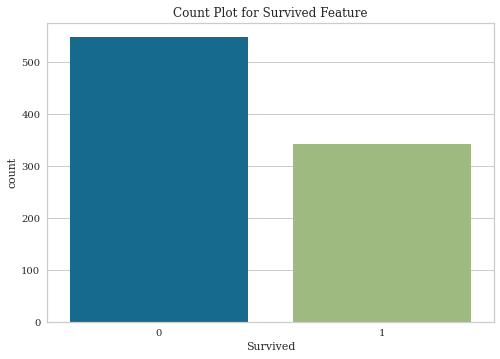

0 - No. of not survived passengers: 549
1 - No. of survived passengers    : 342


In [20]:
#Checking Survived with countplot

sns.countplot(x='Survived',data=numeric_df)
plt.title("Count Plot for Survived Feature")
plt.show()
print(f'0 - No. of not survived passengers: {df_new["Survived"].value_counts()[0]}')
print(f'1 - No. of survived passengers    : {df_new["Survived"].value_counts()[1]}')

Remarks: count plot shows survival rate is lesser.

#  Pclass or Passenger Class

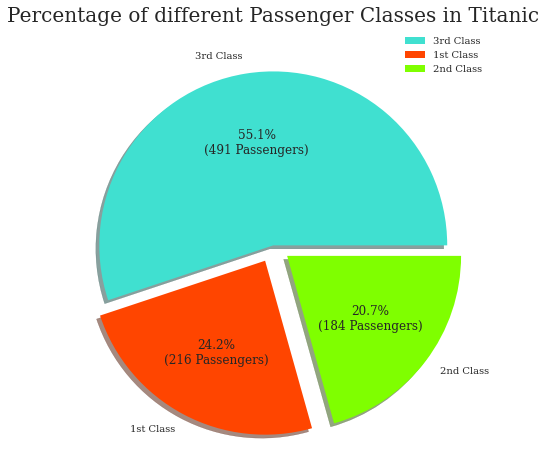

In [21]:
size = list(numeric_df['Pclass'].value_counts())
labels = ['3rd Class', '1st Class', '2nd Class']
colors = ['turquoise', 'orangered', 'chartreuse']
explode = [0, 0.1, 0.1]

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals)))
    return "{:.1f}%\n({:d} Passengers)".format(pct, absolute)

plt.subplots(figsize=(8,8))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, 
        autopct = lambda pct: func(pct, size), labeldistance=1.1)

plt.title('Percentage of different Passenger Classes in Titanic', fontsize = 20)
plt.legend()
plt.show()

Observation: 
We can see that most of the passengers (55.1%) in Titanic were travelling in Economy(3rd) Class.

24.2% & 20.7% passengers in Titanic were travelling in Premium(1st) & Middle(2nd) Class respectively.

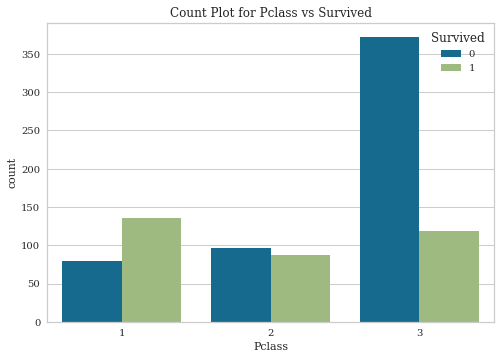

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [22]:
#Checking Pclass and Survived with count plot

sns.countplot(data=numeric_df, x='Pclass', hue='Survived')
plt.title('Count Plot for Pclass vs Survived')
plt.show()

#Checking with the help of crosstab

pd.crosstab(df_new["Pclass"],df_new["Survived"])

Remarks: From the above figure it is inferred that majority of the passengers who were travelling in Economy(3rd) Class of Titanic were not able to survive.

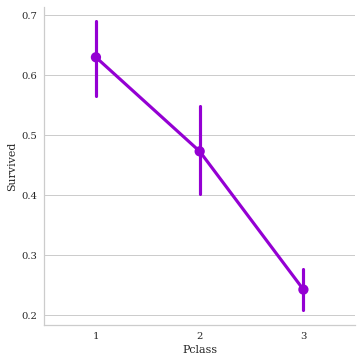

In [23]:
#checking catplot for Pclass Vs Survived
sns.catplot('Pclass','Survived',data=numeric_df, kind='point', color='darkviolet');

Remarks: The Survival rate of Premium(1st) Class passengers is higher than other two passenger classes.
The passengers of Economy(3rd) Class had least Survival rate.

# Fare

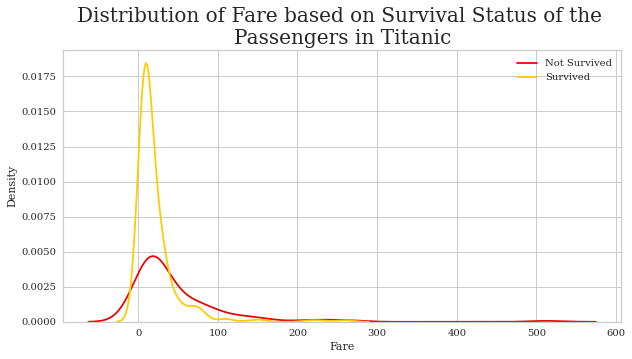

In [24]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=numeric_df, x='Fare', hue='Survived', palette="hot_r");
plt.title("Distribution of Fare based on Survival Status of the \nPassengers in Titanic", fontsize = 20);

plt.legend(loc='upper right', labels=['Not Survived', 'Survived']);

Observation: The Average Fare of 1st, 2nd and 3rd Passenger Class is 84, 20, 13 dollars respectively.

# Parch

In [25]:
def horizontal_bar_plot(feature, dataframe, color, title, adjust, figsize, hue=None):
  #create a barplot 
  plt.figure(figsize=figsize)

  if hue == None:
    ax = sns.countplot(y=feature, data=dataframe, palette=color)
  else:
    ax = sns.countplot(y=feature, data=dataframe, palette=color, hue=hue)

  # Annotate every single Bar with its value, based on it's width           
  for p in ax.patches:
      width = p.get_width()
      plt.text(p.get_width()+adjust[0], p.get_y()+adjust[1]*p.get_height(),
              '{} Passesngers\n[{:.2f}%]'.format(int(width), width*100/df[feature].shape[0]),
              ha='center', va='center')
      
  plt.title(title, fontsize=23);

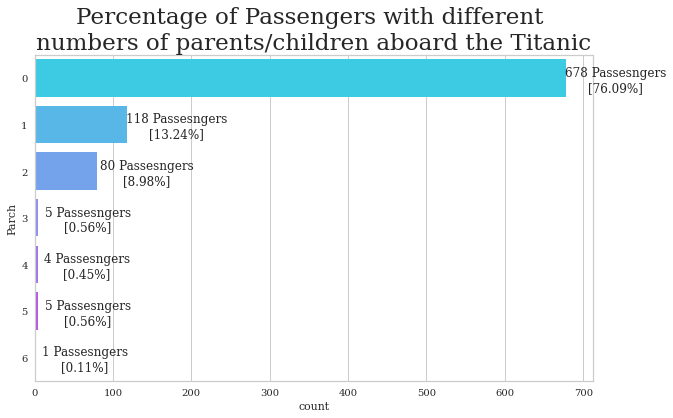

In [26]:
horizontal_bar_plot('Parch', numeric_df, 'cool', 
                    "Percentage of Passengers with different \nnumbers of parents/children aboard the Titanic",
                    (63, 0.55), (10, 6))

Remarks: Majority of the passengers in Titanic were travelling alone (i.e., not travelling with their parents/children).

In [27]:
def bar_plot(attribute, data, color, title, size, space, comparison = None, comparison_order=None):
    plt.figure(figsize=size)
    if comparison == None:
        ax = sns.countplot(x = attribute, data = data, palette=color)
    else:
        ax = sns.countplot(x = attribute, hue = comparison, hue_order=comparison_order, data = data, palette=color)
    total = len(data)
    
    for i in ax.patches:
        percentage = ' '*space + '{:.2f}%'.format((i.get_height()/total)*100)
        x = i.get_x()
        y = i.get_height()
        ax.annotate(percentage, (x,y))
    plt.title(title, size = 20)

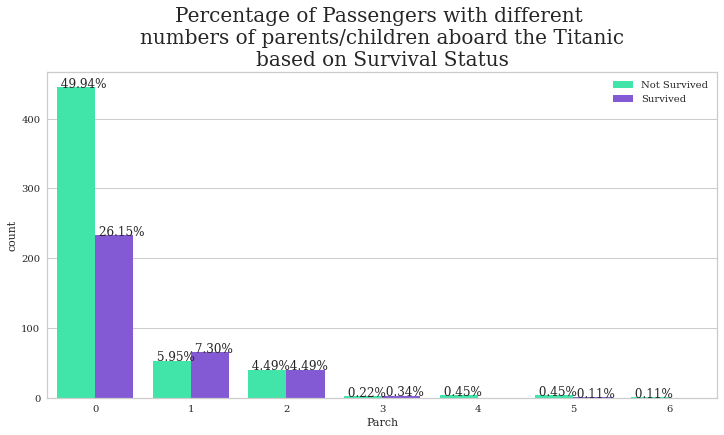

In [28]:
bar_plot('Parch', numeric_df, ['#26ffb0', '#7c46e8'],
         "Percentage of Passengers with different \nnumbers of parents/children aboard the Titanic\nbased on Survival Status",
         (12, 6), 1, 'Survived')

plt.legend(loc='upper right', labels=['Not Survived', 'Survived']);

Remarks: Around 50% of the total passengers in Titanic who were travelling alone, not able to survive.

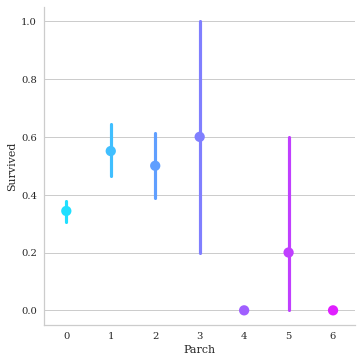

In [29]:
#checking catplot

sns.catplot('Parch','Survived',data=numeric_df, kind='point', palette='cool');

Remarks:
    
The passengers who were travelling with total 3 family members (including himself/herself) has the highest Survival rate.

If we neglect the Parch value of 4, 5 and 6 then the passengers who were travelling alone has the least Survival rate.

# Age

Age Column represents age of the passenger. As Age is continuous Variable, here We've considered the following standard age groups Infant(0 - 2), Toddler(2 - 4), Child(4 - 9), Teenager(9 - 15), Adult(15 - 21), Mid-Age(21 - 44), Middle Senior(44 - 60), Old-Age(60 - 80)

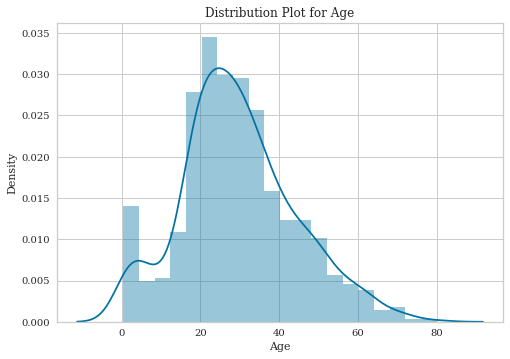

In [30]:
#Checking data distribution using distplot for Age
sns.distplot(numeric_df['Age'])
plt.title('Distribution Plot for Age')
plt.show()

Remarks: The distribution plot shows Age is somewhat normally distributed.

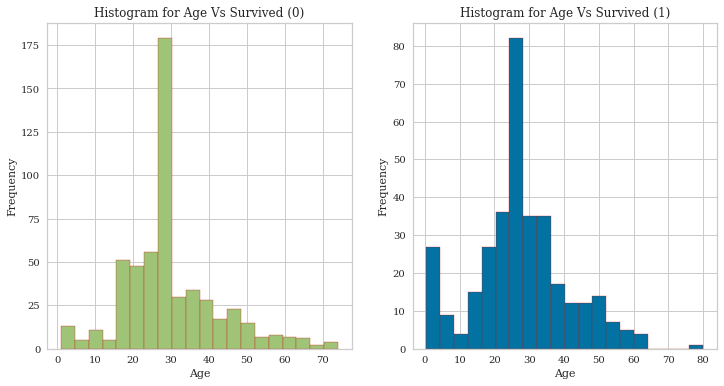

In [31]:
#Checking Age and Survived with histogram
fig, axes = plt.subplots(1,2,figsize=(12,6))
df_new[numeric_df["Survived"]==0]["Age"].plot.hist(ax=axes[0],edgecolor='r',color='g', bins=20)
axes[0].set_title('Histogram for Age Vs Survived (0)')
axes[0].set_xlabel('Age')

df_new[numeric_df['Survived']==1]["Age"].plot.hist(ax=axes[1],edgecolor='r',color='b', bins=20)
axes[1].set_title("Histogram for Age Vs Survived (1)")
axes[1].set_xlabel("Age")
plt.show()

Remarks: From the above figure we can say that most of passengers in Titanic belongs to the mid-Age group (i.e., age between 21 & 44).

Most of the passengers not survived falls in age range of 15 to 40.

Most of the passengers survived falls in age range of 20 to 35.

Oldest passenger that survived was of age 80.

# SibSp

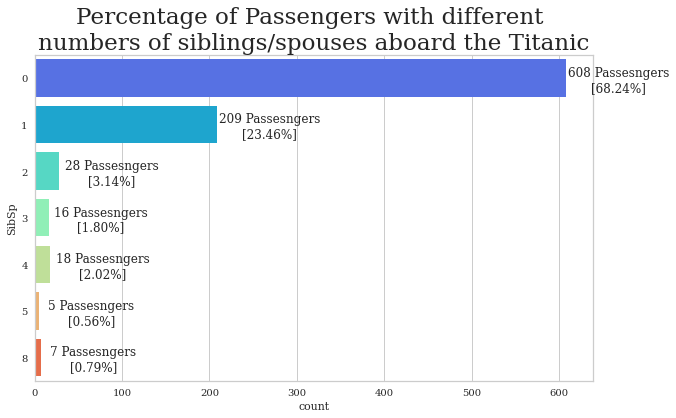

In [32]:
horizontal_bar_plot('SibSp', numeric_df, 'rainbow', 
                    "Percentage of Passengers with different \nnumbers of siblings/spouses aboard the Titanic",
                    (60, 0.55), (10, 6))

Remarks: Similar to the Parch feature, majority of the passengers (68.24%) in Titanic were travelling alone (i.e., not travelling with their siblings/spouses).

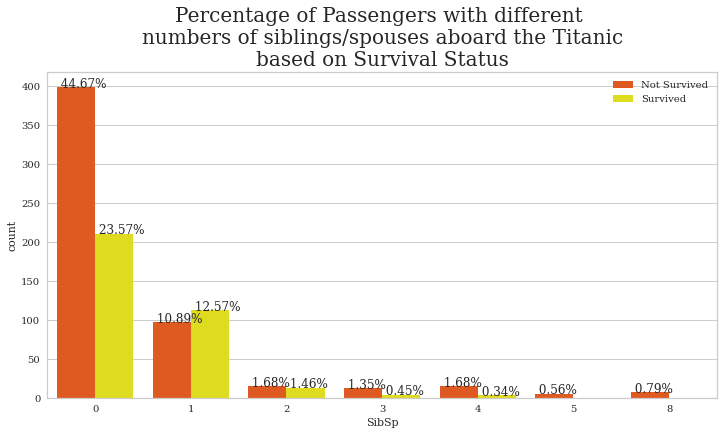

In [33]:
bar_plot('SibSp', numeric_df, ['#ff4d00', '#fffb00'],
         "Percentage of Passengers with different \nnumbers of siblings/spouses aboard the Titanic\nbased on Survival Status",
         (12, 6), 1, 'Survived')

plt.legend(loc='upper right', labels=['Not Survived', 'Survived']);

Remarks: 45% of the total passengers in Titanic who were travelling alone (i.e., not travelling with their siblings/spouses) not able to survive.

# Categorical Feature Analysis

In [34]:
# create a list of all categorical features
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [35]:
# create the dataframe of all categorical features
categorical_df = df[categorical_features]
categorical_df

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


# Univariate Analysis of Categorical Features:

# Embarked

Embarked column represents the Port location of Embarkation of the passengers
C = Cherbourg, Q = Queenstown, S = Southampton

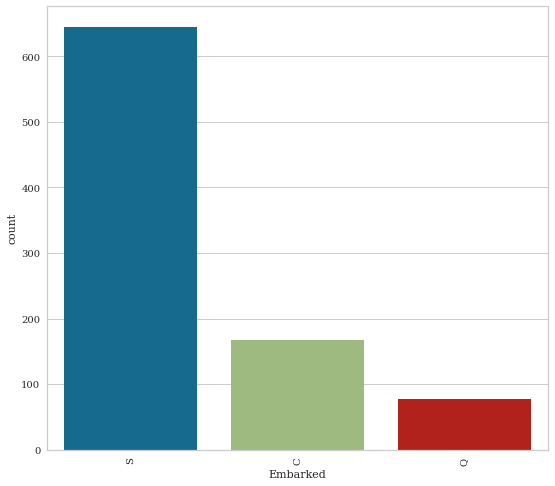

In [36]:
col=['Embarked']

plt.figure(figsize=(15,20))
for i in range(len(col)):
  plt.subplot(3,2,i+1)
  sns.countplot(df[col[i]])
  plt.xticks(rotation=90)
  plt.tight_layout()

Remarks:
    
Majority of the passengers in Titanic embarked from the Southampton port.
    
Only a few of the passengers in Titanic embarked from the Queenstown port.

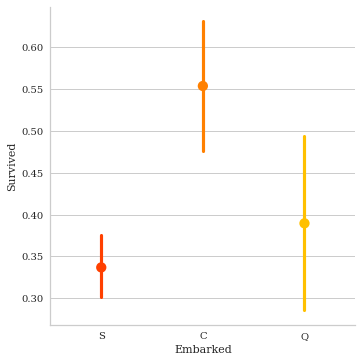

In [37]:
sns.catplot('Embarked','Survived',data= df, kind='point', palette='autumn');

Remarks: 
    
The passengers who embarked from Cherbourg Port had the highest Survival rate.
    
The passengers who embarked from Southampton Port had the least Survival rate.

# Sex

The Column Sex represnts the gender(i.e., Male, Female) of the passenger

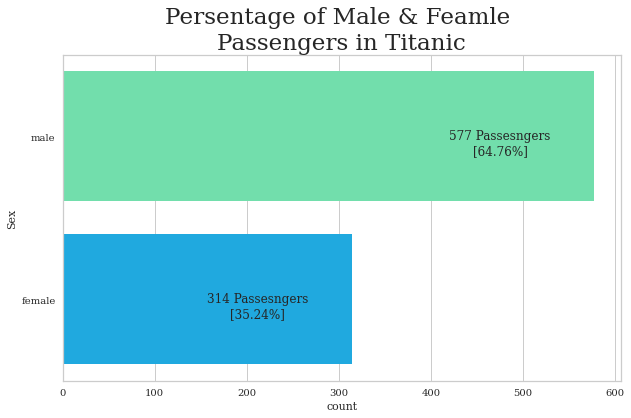

In [38]:
horizontal_bar_plot('Sex', categorical_df, ['#60f0ad', '#00b7ff'], 
                    'Persentage of Male & Feamle \nPassengers in Titanic',
                    (-102, 0.55), (10, 6))

Remarks: Most of the passengers (around 65%) in Titanic were Male.

In Titanic only around 35% of the total passengers were Female.

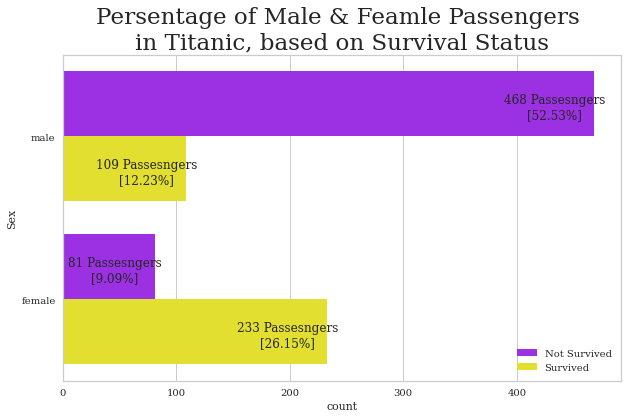

In [39]:
horizontal_bar_plot('Sex', df, ['#a114ff', '#fffb14'], 
                    'Persentage of Male & Feamle Passengers \nin Titanic, based on Survival Status',
                    (-35, 0.55), (10, 6), 'Survived')

plt.legend(loc='lower right', labels=['Not Survived', 'Survived']);

Remarks: 52.53% of the total passenger in Titanic who were not able to survive was Male.

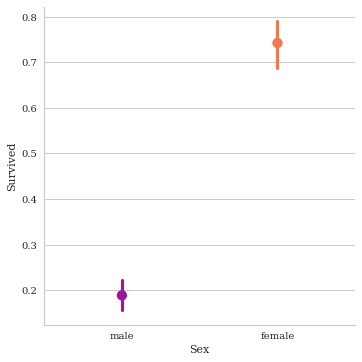

In [40]:
sns.catplot('Sex','Survived',data=df, kind='point', palette='plasma');

Remarks: Overall the Survival rate of Female passengers is almost 4 times greater than the Male passengers.

# Numerical & Categorial Multivariate Analysis:

# Pclass-Sex-Survived

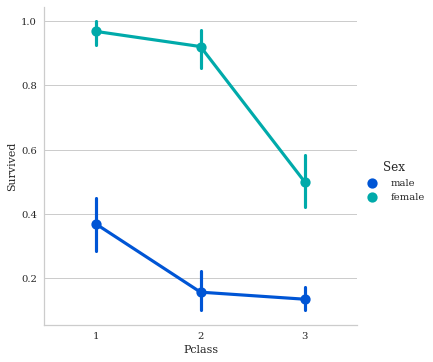

In [41]:
sns.catplot('Pclass','Survived',hue='Sex',data= df, kind='point', palette='winter');

Remarks:
    
In all Passenger Classes, Female passengers had more survived than the Male passengers.

The Female passengers who were travelling in Premium(1st) Class of Titanic had the highest Survival Rate compared with other Class's Male and Female passengers.

The Male passengers who were travelling in Economy(3rd) Class of Titanic had the least Survival Rate compared with other Class's Male and Female passengers.

# Embarked-Sex-Survived

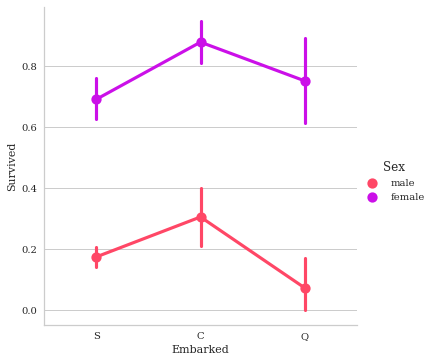

In [42]:
sns.catplot("Embarked", "Survived", hue="Sex", data= df, kind="point", palette=['#ff4766', '#cb10e8']);

Remarks:

The Female passengers who embarked from Cherbourg Port in Titanic had the highest Survival Rate.

The Male passengers who embarked from Queenstown Port in Titanic had the least Survival Rate.

# Embarked-Pclass-Sex-Survived

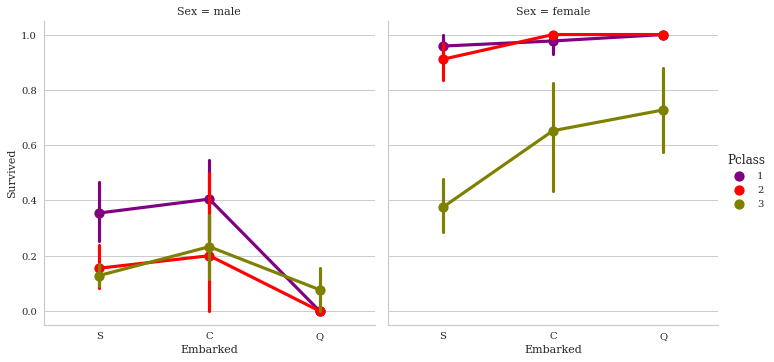

In [43]:
sns.catplot("Embarked", 'Survived', hue="Pclass", col="Sex", data= df, kind="point", palette='brg');

Remarks:
    
The Female passengers who embarked from Cherbourg Port and belongs to the Premium(1st) Class in Titanic had the highest Survival Rate.

The Male passengers who embarked from Queenstown Port and belongs to Economy(3rd) Class in Titanic had the least Survival Rate.

# Parch-Sex-Survived & SibSp-Sex-Survived

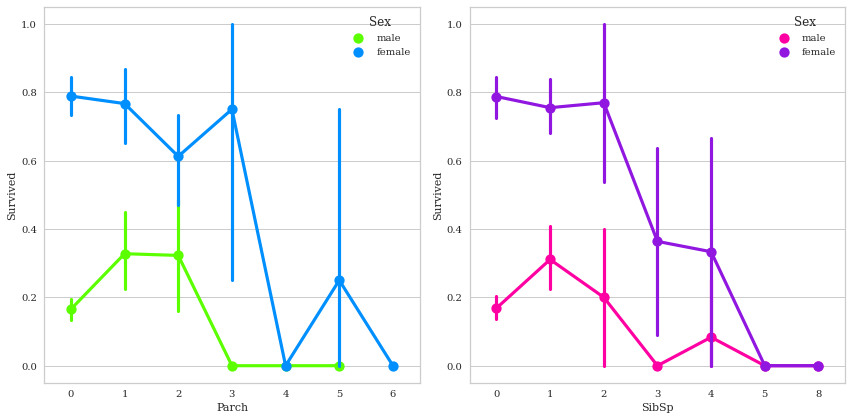

In [44]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121)
g = sns.pointplot("Parch", 'Survived', hue="Sex", data=df, kind="point", palette='gist_rainbow', ax=ax1);

ax2 = fig.add_subplot(122)
sns.pointplot("SibSp", 'Survived', hue="Sex", data=df, kind="point", palette=['#ff00a2', '#9016e0'], ax=ax2);

plt.tight_layout()

Remarks: The Female passengers who were travelling alone in Titanic had the highest Survival Rate compared with the other Male and Female passengers who were travelling alone as well as with their family.

# Age-Embarked-Pclass-Sex-Survived

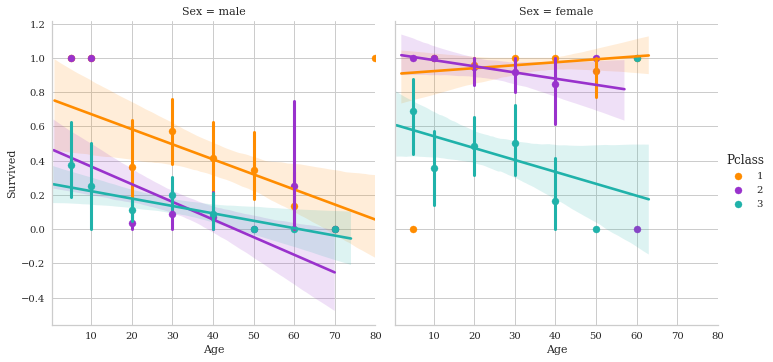

In [45]:
generations = [5, 10, 20, 30, 40, 50, 60, 70 , 80]
sns.lmplot("Age", "Survived",
            hue="Pclass", col="Sex",
            data=df,
            palette=["darkorange","darkorchid","lightseagreen"], x_bins=generations);

Remarks: 

As the Age Increases, passenger's Survival Rate also increases for all kind of passengers except for the Female passengers of middle(2nd) Class.

The females, males and child of premium(1st) class had higher Survival rate than other classes.

In Economy(3rd) class more child had survived.

The old-age Female passengers of Premium(1st) class had highest Survival Rate.

The old-age Male passengers of Economy(3rd) class had least Survival Rate.

# Checking Correlation:

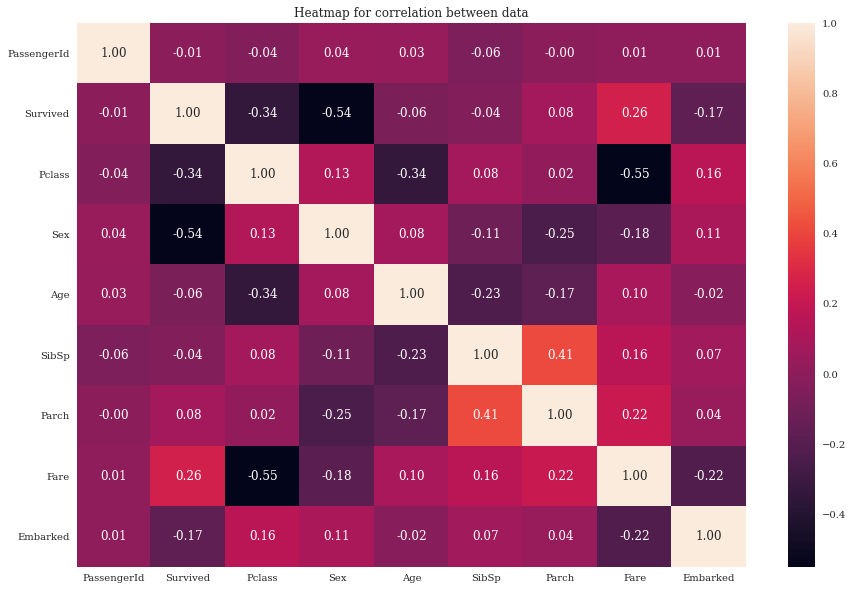

In [46]:
#Checking correlation between data using heatmap
df_corr = df_new.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr,annot=True,fmt=".2f")
plt.title('Heatmap for correlation between data')
plt.show()

Observations:

1. Pclass is the most correlated numeric feature with Survived(target) attribute compared with other numeric features.
2. Pclass and Fare features have significant negative correlation value (0.55) which is as our expectation.
3. SibSp and Parch, these two features have significant positive correlation value (0.41)
4. PassengerId feature has no reasonable correlation with any other features.

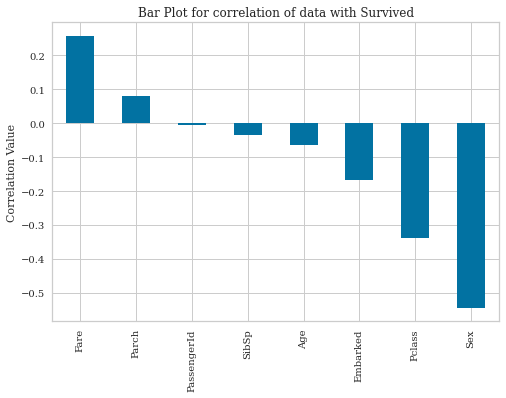

In [47]:
#Checking correlation with the help of bar plot
df_corr["Survived"].sort_values(ascending=False).drop(['Survived']).plot.bar()
plt.title('Bar Plot for correlation of data with Survived')
plt.ylabel('Correlation Value')
plt.show()

Remarks: 
    Fare is positively high correlated to Survived. 
    Sex and Pclass is negatively high correlated to Survived

# Checking Outliers:

<AxesSubplot:xlabel='variable', ylabel='value'>

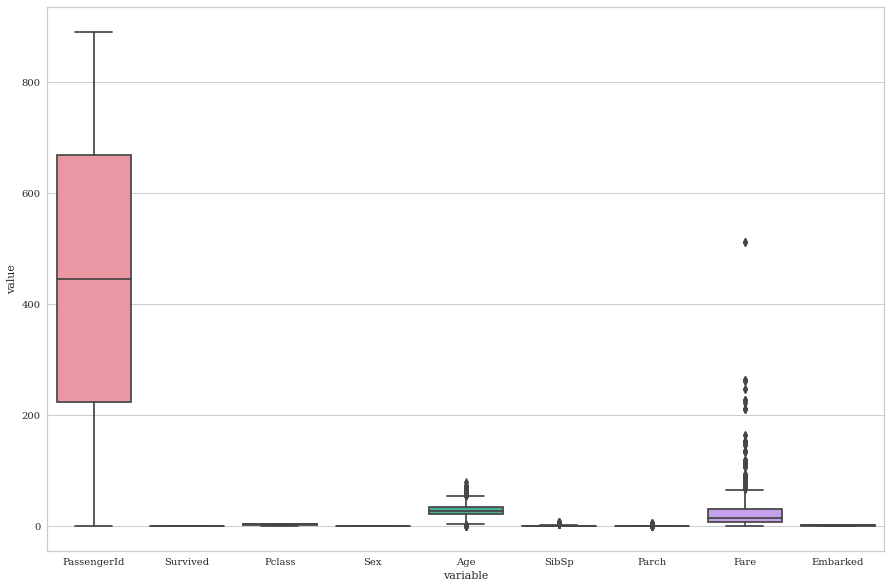

In [48]:
plt.figure(figsize=(15,10))
sns.boxplot(x='variable',y='value',data=pd.melt(df_new))

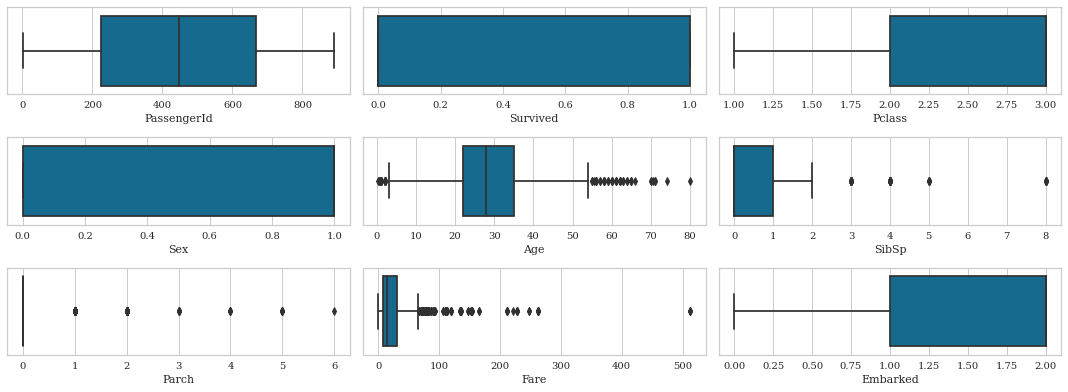

In [49]:
new=df_new.columns.values
plt.figure(figsize=(15,7))
for i in range(len(new)):
  plt.subplot(4,3,i+1)
  sns.boxplot(df_new[new[i]])
  plt.tight_layout()

Remarks: The box-plot of Age and Fare shows presence of outliers.

# Removing Outliers:

In [50]:
#Checking with zscore
from scipy.stats import zscore
z = np.abs(zscore(df_new))
np.where(z>3) #Checking for possible outliers

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([6, 5, 6, 7, 5, 5, 5, 5, 6, 7, 4, 4, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5,
        7, 5, 5, 5, 7, 7, 5, 7, 6, 7, 7, 5, 6, 6, 7, 5, 4, 7, 5, 5, 7, 6,
        6, 4, 6, 4, 6, 7, 5, 5, 7, 7, 7, 7, 6, 7, 7, 4, 6, 7, 5, 5, 5, 5,
        5, 5, 4, 6, 5, 6], dtype=int64))

In [51]:
#Removing outliers
df_new_wo = df_new[(z<3).all(axis=1)]

In [52]:
#Comparing dataset
print(f'Original: {df_new.shape},\t New: {df_new_wo.shape},\t LOSS: {(len(df_new)-len(df_new_wo))*100/len(df_new)}%')

Original: (891, 9),	 New: (820, 9),	 LOSS: 7.968574635241302%


Remarks: -Since data loss percentage is >5, we will proceed with original data.

# Skewness:

In [53]:
#checking skewness in dataset
df_new.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.510245
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.264823
dtype: float64

Remarks: SibSp, Parch, Fare has right skewed data. Embarked has left skewed data.

# Preparing Data for Model:

In [54]:
x = df_new.drop(columns=['Survived'])
y = df_new["Survived"]
print(x.shape)
print(y.shape)

(891, 8)
(891,)


In [55]:
#Removing skewness by transforming data.

from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

In [56]:
#Scaling training data using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(x)

In [57]:
#Spliting data for model using train test split and finding best random_state using LogisticClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Best random_state
lr = LogisticRegression()
best_acscore = 0
best_rstate = 0
for i in range(1000):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    lr_predict_y = lr.predict(x_test)
    temp_acscore = accuracy_score(y_test,lr_predict_y)
    if temp_acscore>best_acscore:
        best_acscore = temp_acscore
        best_rstate = i
        
print(f'Best random_state: {best_rstate} found with best accuracy_score: {best_acscore}')

Best random_state: 710 found with best accuracy_score: 0.8834080717488789


# Spliting the train test data with random_state = 710

In [58]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x,y,test_size=0.25,random_state=710)

# Finding the best model:

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. LogisticRegression

Accuracy Score: 0.8834080717488789
------------------


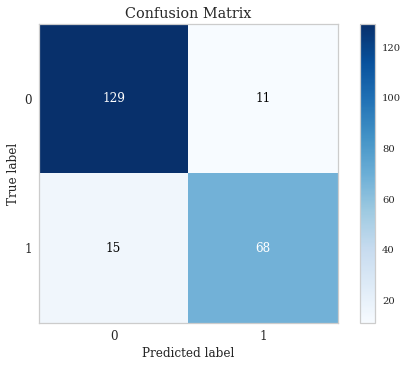

-----------------------
 Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       140
           1       0.86      0.82      0.84        83

    accuracy                           0.88       223
   macro avg       0.88      0.87      0.87       223
weighted avg       0.88      0.88      0.88       223



In [60]:
Lr = LogisticRegression()
Lr.fit(x_train,y_train)
Lr_predict_y = Lr.predict(x_test)
Lr_aScore = accuracy_score(y_test,Lr_predict_y)
Lr_cMatrix = confusion_matrix(y_test,Lr_predict_y)
Lr_cReport = classification_report(y_test,Lr_predict_y)

print(f'Accuracy Score: {Lr_aScore}')

print(f'------------------')
skplt.metrics.plot_confusion_matrix(y_test,Lr_predict_y)
plt.show()

print(f'-----------------------')
print(f' Classification Report')
print(f'-----------------------')
print(Lr_cReport)

# 2. GaussianNB

Accuracy Score: 0.8475336322869955
------------------


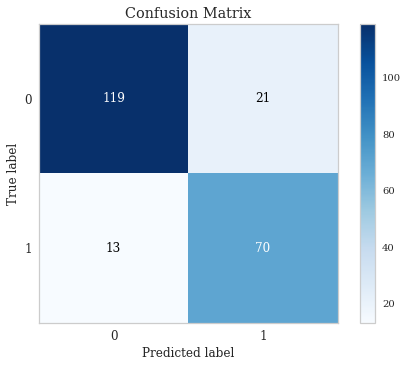

-----------------------
 Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       140
           1       0.77      0.84      0.80        83

    accuracy                           0.85       223
   macro avg       0.84      0.85      0.84       223
weighted avg       0.85      0.85      0.85       223



In [61]:
Gnb = GaussianNB()
Gnb.fit(x_train,y_train)
Gnb_predict_y = Gnb.predict(x_test)

Gnb_aScore = accuracy_score(y_test,Gnb_predict_y)
Gnb_cMatrix = confusion_matrix(y_test,Gnb_predict_y)
Gnb_cReport = classification_report(y_test,Gnb_predict_y)

print(f'Accuracy Score: {Gnb_aScore}')

print('------------------')
skplt.metrics.plot_confusion_matrix(y_test,Gnb_predict_y)
plt.show()

print('-----------------------')
print(' Classification Report')
print('-----------------------')
print(Gnb_cReport)

# 3. SVC

Accuracy Score: 0.8699551569506726
------------------


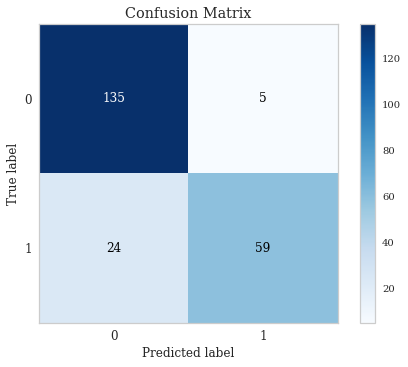

-----------------------
 Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       140
           1       0.92      0.71      0.80        83

    accuracy                           0.87       223
   macro avg       0.89      0.84      0.85       223
weighted avg       0.88      0.87      0.87       223



In [62]:
Svc = SVC()
Svc.fit(x_train,y_train)
Svc_predict_y = Svc.predict(x_test)

Svc_aScore = accuracy_score(y_test,Svc_predict_y)
Svc_cMatrix = confusion_matrix(y_test,Svc_predict_y)
Svc_cReport = classification_report(y_test,Svc_predict_y)

print(f'Accuracy Score: {Svc_aScore}')

print('------------------')
skplt.metrics.plot_confusion_matrix(y_test,Svc_predict_y)
plt.show()

print('-----------------------')
print(' Classification Report')
print('-----------------------')
print(Svc_cReport)

# 4.DecisionTreeClassifier

Accuracy Score: 0.7757847533632287
------------------


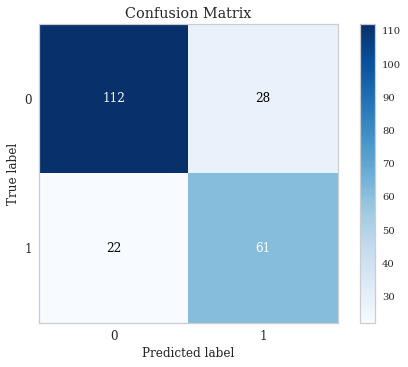

-----------------------
 Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       140
           1       0.69      0.73      0.71        83

    accuracy                           0.78       223
   macro avg       0.76      0.77      0.76       223
weighted avg       0.78      0.78      0.78       223



In [63]:
Dtc = DecisionTreeClassifier()
Dtc.fit(x_train,y_train)
Dtc_predict_y = Dtc.predict(x_test)

Dtc_aScore = accuracy_score(y_test,Dtc_predict_y)
Dtc_cMatrix = confusion_matrix(y_test,Dtc_predict_y)
Dtc_cReport = classification_report(y_test,Dtc_predict_y)

print(f'Accuracy Score: {Dtc_aScore}')

print('------------------')
skplt.metrics.plot_confusion_matrix(y_test,Dtc_predict_y)
plt.show()

print('-----------------------')
print(' Classification Report')
print('-----------------------')
print(Dtc_cReport)

# 5. RandomForestClassifier

Accuracy Score: 0.8475336322869955
------------------


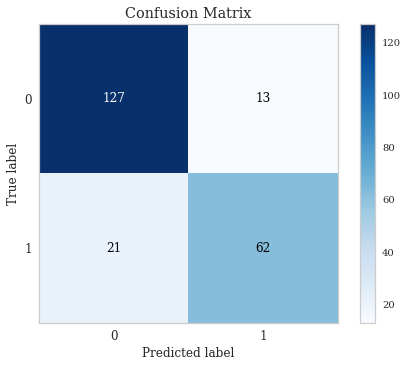

-----------------------
 Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       140
           1       0.83      0.75      0.78        83

    accuracy                           0.85       223
   macro avg       0.84      0.83      0.83       223
weighted avg       0.85      0.85      0.85       223



In [64]:
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
clf_predict_y = clf.predict(x_test)

clf_aScore = accuracy_score(y_test,clf_predict_y)
clf_cMatrix = confusion_matrix(y_test,clf_predict_y)
clf_cReport = classification_report(y_test,clf_predict_y)

print(f'Accuracy Score: {clf_aScore}')

print('------------------')
skplt.metrics.plot_confusion_matrix(y_test,clf_predict_y)
plt.show()

print('-----------------------')
print(' Classification Report')
print('-----------------------')
print(clf_cReport)

# 6. ExtraTreesClassifier

Accuracy Score: 0.8385650224215246
------------------


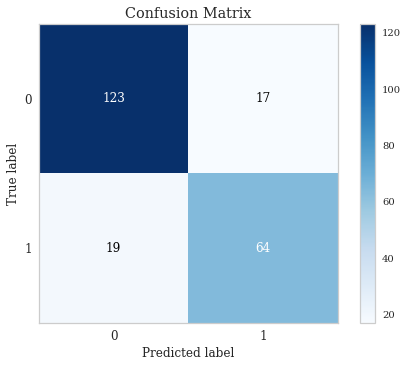

-----------------------
 Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       140
           1       0.79      0.77      0.78        83

    accuracy                           0.84       223
   macro avg       0.83      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223



In [65]:
Xtc = ExtraTreesClassifier()
Xtc.fit(x_train,y_train)
Xtc_predict_y = Xtc.predict(x_test)

Xtc_aScore = accuracy_score(y_test,Xtc_predict_y)
Xtc_cMatrix = confusion_matrix(y_test,Xtc_predict_y)
Xtc_cReport = classification_report(y_test,Xtc_predict_y)

print(f'Accuracy Score: {Xtc_aScore}')

print('------------------')
skplt.metrics.plot_confusion_matrix(y_test,Xtc_predict_y)
plt.show()

print('-----------------------')
print(' Classification Report')
print('-----------------------')
print(Xtc_cReport)

# 7. KNeighborsClassifier

Accuracy Score: 0.852017937219731
------------------


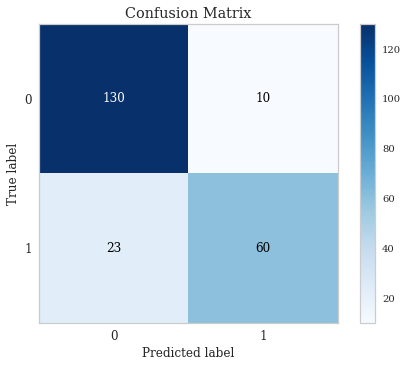

-----------------------
 Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       140
           1       0.86      0.72      0.78        83

    accuracy                           0.85       223
   macro avg       0.85      0.83      0.84       223
weighted avg       0.85      0.85      0.85       223



In [66]:
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
KNN_predict_y = KNN.predict(x_test)

KNN_aScore = accuracy_score(y_test,KNN_predict_y)
KNN_cMatrix = confusion_matrix(y_test,KNN_predict_y)
KNN_cReport = classification_report(y_test,KNN_predict_y)

print(f'Accuracy Score: {KNN_aScore}')

print('------------------')
skplt.metrics.plot_confusion_matrix(y_test,KNN_predict_y)
plt.show()

print('-----------------------')
print(' Classification Report')
print('-----------------------')
print(KNN_cReport)

# 8. XGBClassifier

[13:42:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.8475336322869955
------------------


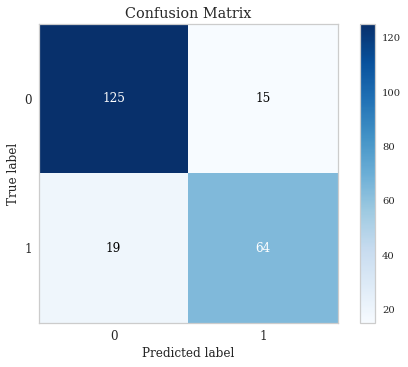

-----------------------
 Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       140
           1       0.81      0.77      0.79        83

    accuracy                           0.85       223
   macro avg       0.84      0.83      0.84       223
weighted avg       0.85      0.85      0.85       223



In [67]:
XGB = XGBClassifier()
XGB.fit(x_train,y_train)
XGB_predict_y = XGB.predict(x_test)

XGB_aScore = accuracy_score(y_test,XGB_predict_y)
XGB_cMatrix = confusion_matrix(y_test,XGB_predict_y)
XGB_cReport = classification_report(y_test,XGB_predict_y)

print(f'Accuracy Score: {XGB_aScore}')

print('------------------')
skplt.metrics.plot_confusion_matrix(y_test,XGB_predict_y)
plt.show()
print('-----------------------')
print(' Classification Report')
print('-----------------------')
print(XGB_cReport)


# From above model building, LogisticRegression is performing well with accuracy_score = 88.34%, so,we are proceeding with LogisticRegression

# Hyper parameter tuning on the best ML Model:

In [68]:
#Checking for best cv

best_cv = 0
best_cvscore = 0
for i in range(2,20):
    temp_cvscore = cross_val_score(LogisticRegression(),x_train,y_train,cv=i).mean()
    if temp_cvscore>best_cvscore:
        best_cvscore = temp_cvscore
        best_cv = i
        
print(f'Best cv: {best_cv} with best cross_val_score: {best_cvscore}')

Best cv: 16 with best cross_val_score: 0.7680749128919862


In [69]:
#Hypertuning parameters with cv=16

parameters = {
    "solver": ['newton-cg','lbfgs','liblinear','sag','saga'],
    "max_iter": [100,200,300,400,500]
}

gscv_Lr = GridSearchCV(LogisticRegression(),parameters,cv=16)
gscv_Lr.fit(x_train,y_train)

gscv_Lr.best_params_

{'max_iter': 100, 'solver': 'newton-cg'}

Final Model Accuracy: 0.8834080717488789
------------------


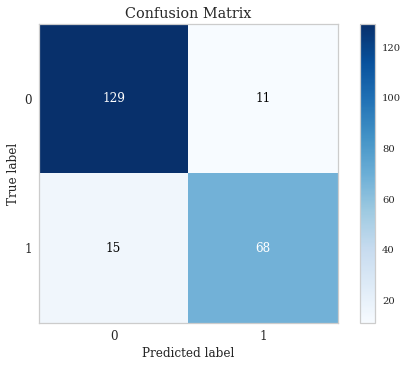

-----------------------
 Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       140
           1       0.86      0.82      0.84        83

    accuracy                           0.88       223
   macro avg       0.88      0.87      0.87       223
weighted avg       0.88      0.88      0.88       223



In [70]:
#Checking the model performance with best params
gscv_Lr_predict_y = gscv_Lr.best_estimator_.predict(x_test)

gscv_Lr_aScore = accuracy_score(y_test,gscv_Lr_predict_y)
gscv_Lr_cMatrix = confusion_matrix(y_test,gscv_Lr_predict_y)
gscv_Lr_cReport = classification_report(y_test,gscv_Lr_predict_y)

print(f'Final Model Accuracy: {gscv_Lr_aScore}')

print('------------------')
skplt.metrics.plot_confusion_matrix(y_test,gscv_Lr_predict_y)
plt.show()
print('-----------------------')
print(' Classification Report')
print('-----------------------')
print(gscv_Lr_cReport)

# AUC ROC Curve:

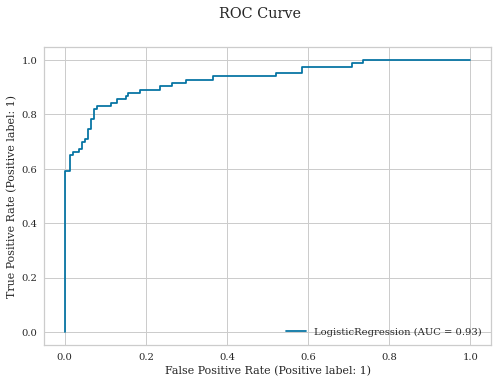

In [71]:
disp = metrics.plot_roc_curve(Lr, x_test, y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

Remarks: The AUC ROC Curve displays the ability of the classifier to distinguish between the categories present in a label. The larger the number on AUC results in better performing model which identifies positive and negative classes successfully showcasing the same on a graph.

# Saving the Model or Serialization:

In [72]:
filename = 'Titanic_Final_Model.pkl'
joblib.dump(gscv_Lr.best_estimator_,open(filename,'wb'))

Remarks:We are using the joblib option to save the final model but it can be done using pickle too.

# Loading the model:

In [73]:
load_model = joblib.load(filename)
result = load_model.score(x_test, y_test)
print(result)

0.8834080717488789


Remarks: Finally loading the saved final model to check the score on unseen data set.

# Conclusion:

In [74]:
Conc = {"Original":np.array(y_test), "Predicted":np.array(gscv_Lr_predict_y)}
Conc_df = pd.DataFrame(Conc)
Conc_df

,Original,Predicted
0,0,1
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
218,0,0
219,0,0
220,0,0
221,0,0


Remarks:

Table shows the original target value and predicted target value. From the above table, the model is predicting the values with 88.34 percent accuracy.